In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [152]:
literacy = pd.read_csv('/Users/chancetokubo/mess/literacy rates - County.csv')
combined_votes = pd.read_csv('/Users/chancetokubo/mess/2024_US_County_Level_Presidential_Results.csv')

In [153]:
combined_votes

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,Alabama,1001,Autauga County,20484,7439,28190,13045.0,0.726641,0.263888,0.462753
1,Alabama,1003,Baldwin County,95798,24934,121808,70864.0,0.786467,0.204699,0.581768
2,Alabama,1005,Barbour County,5606,4158,9832,1448.0,0.570179,0.422905,0.147274
3,Alabama,1007,Bibb County,7572,1619,9241,5953.0,0.819392,0.175197,0.644194
4,Alabama,1009,Blount County,25354,2576,28115,22778.0,0.901796,0.091624,0.810173
...,...,...,...,...,...,...,...,...,...,...
3155,Wyoming,56037,Sweetwater County,12541,3731,16569,8810.0,0.756895,0.225180,0.531716
3156,Wyoming,56039,Teton County,4134,8748,13077,-4614.0,0.316128,0.668961,-0.352833
3157,Wyoming,56041,Uinta County,7282,1561,8984,5721.0,0.810552,0.173753,0.636799
3158,Wyoming,56043,Washakie County,3125,656,3841,2469.0,0.813590,0.170789,0.642801


In [154]:
literacy_combined = literacy.groupby('FIPS_code',as_index=False).mean(numeric_only=True)
len(literacy_combined)

3142

In [155]:
votes = combined_votes[(combined_votes['county_fips'].isin(literacy_combined['FIPS_code']))]

In [156]:
score = literacy_combined[(literacy_combined['FIPS_code'].isin(votes['county_fips']))]

In [157]:
len(votes) == len(score)

True

In [158]:
score.columns

Index(['FIPS_code', 'Lit_P1', 'Lit_P1_CI_L', 'Lit_P1_CI_U', 'Lit_P1_CV',
       'Lit_P1_indicator', 'Lit_P1_CI_L_indicator', 'Lit_P1_CI_U_indicator',
       'Lit_P1_CV_indicator', 'Lit_P2', 'Lit_P2_CI_L', 'Lit_P2_CI_U',
       'Lit_P2_CV', 'Lit_P2_indicator', 'Lit_P2_CI_L_indicator',
       'Lit_P2_CI_U_indicator', 'Lit_P2_CV_indicator', 'Lit_P3', 'Lit_P3_CI_L',
       'Lit_P3_CI_U', 'Lit_P3_CV', 'Lit_P3_indicator', 'Lit_P3_CI_L_indicator',
       'Lit_P3_CI_U_indicator', 'Lit_P3_CV_indicator', 'Lit_A', 'Lit_A_CI_L',
       'Lit_A_CI_U', 'Lit_A_CV', 'Num_P1', 'Num_P1_CI_L', 'Num_P1_CI_U',
       'Num_P1_CV', 'Num_P1_indicator', 'Num_P1_CI_L_indicator',
       'Num_P1_CI_U_indicator', 'Num_P1_CV_indicator', 'Num_P2', 'Num_P2_CI_L',
       'Num_P2_CI_U', 'Num_P2_CV', 'Num_P2_indicator', 'Num_P2_CI_L_indicator',
       'Num_P2_CI_U_indicator', 'Num_P2_CV_indicator', 'Num_P3', 'Num_P3_CI_L',
       'Num_P3_CI_U', 'Num_P3_CV', 'Num_P3_indicator', 'Num_P3_CI_L_indicator',
       'Num_P3_CI_U

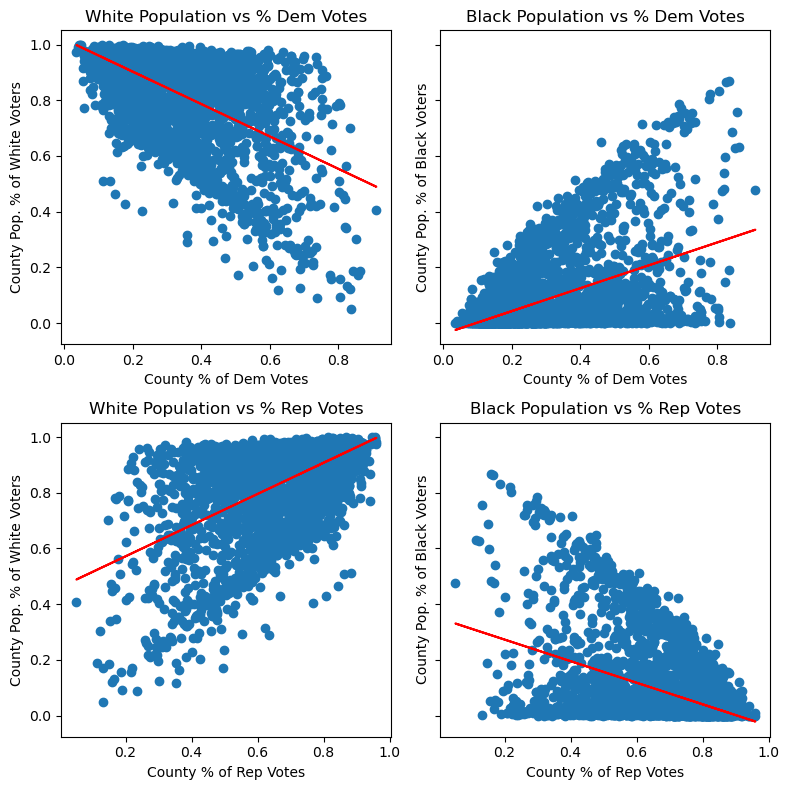

In [159]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
x1 = votes['votes_dem'] / votes['total_votes']
y1 = score['White']
x2 = votes['votes_dem'] / votes['total_votes']
y2 = score['Black']
x3 = votes['votes_gop'] / votes['total_votes']
y3 = score['White']
x4 = votes['votes_gop'] / votes['total_votes']
y4 = score['Black']

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharey=True)

# First subplot: White population
axes[0,0].scatter(x1, y1)
a1, b1 = np.polyfit(x1, y1, 1)
axes[0,0].plot(x1, a1 * x1 + b1, color='red')
axes[0,0].set_title('White Population vs % Dem Votes')
axes[0,0].set_xlabel('County % of Dem Votes')
axes[0,0].set_ylabel('County Pop. % of White Voters')

# Second subplot: Black population
axes[0,1].scatter(x2, y2)
a2, b2 = np.polyfit(x2, y2, 1)
axes[0,1].plot(x2, a2 * x2 + b2, color='red')
axes[0,1].set_title('Black Population vs % Dem Votes')
axes[0,1].set_xlabel('County % of Dem Votes')
axes[0,1].set_ylabel('County Pop. % of Black Voters')

axes[1,0].scatter(x3, y3)
a3, b3 = np.polyfit(x3, y3, 1)
axes[1,0].plot(x3, a3 * x3+ b3, color='red')
axes[1,0].set_title('White Population vs % Rep Votes')
axes[1,0].set_xlabel('County % of Rep Votes')
axes[1,0].set_ylabel('County Pop. % of White Voters')

# Second subplot: Black population
axes[1,1].scatter(x4, y4)
a4, b4 = np.polyfit(x4, y4, 1)
axes[1,1].plot(x4, a4 * x4 + b4, color='red')
axes[1,1].set_title('Black Population vs % Rep Votes')
axes[1,1].set_xlabel('County % of Rep Votes')
axes[1,1].set_ylabel('County Pop. % of Black Voters')

plt.tight_layout()
plt.show()


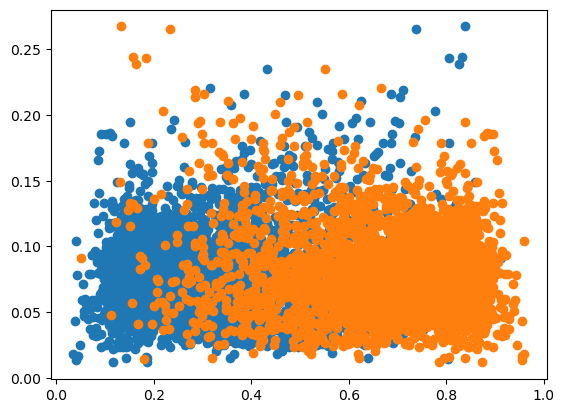

In [182]:
x = votes['per_dem']
x1 = votes['per_gop']
y = score['Poverty_100']*score['Female']

plt.scatter(x,y)
plt.scatter(x1,y)
plt.show()

In [184]:
\

(76365013, 73630643)